In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [103]:
with open('logs.pickle', 'rb') as fp:
    joints, targets, actions = pickle.load(fp)

In [104]:
joints_arr = np.empty((len(joints), len(joints[0])), dtype=np.float32)
targets_arr = np.empty_like(joints_arr)
actions_arr = np.empty_like(joints_arr)

keys = sorted(joints[0].keys())
for i in range(len(joints)):
    for j in range(len(keys)):
        joints_arr[i, j] = joints[i][keys[j]]
        targets_arr[i, j] = targets[i][keys[j]]
        actions_arr[i, j] = actions[i][keys[j]]

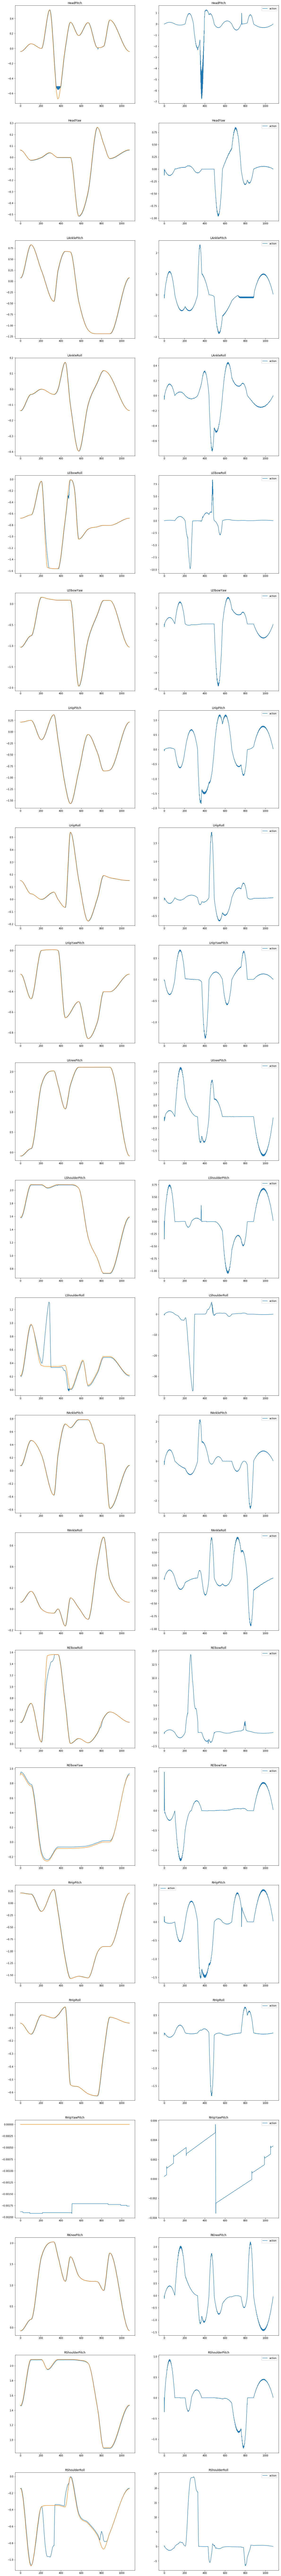

In [105]:
plt.figure(figsize=(20, 200))
for i in range(len(keys)):
    plt.subplot(22, 2, 2 * i + 1)
    plt.plot(joints_arr[:, i], label='joint')
    plt.plot(targets_arr[:, i], label='target')
    plt.title(keys[i])
    plt.subplot(22, 2, 2 * i + 2)
    plt.plot(actions_arr[:, i], label='action')
    plt.title(keys[i])
    plt.legend()